In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("D:\\NEW_AQI.csv")

In [3]:
aqi=data.iloc[:,2:9]

In [4]:
aqi

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,61.25,100.46,39.37,0.25,6.08,69.11,110.0
1,47.21,80.12,52.00,0.33,20.73,47.61,103.0
2,65.45,132.09,58.68,0.31,22.99,50.37,103.0
3,116.03,197.89,58.20,0.15,37.31,56.42,215.0
4,96.21,162.27,57.60,0.00,25.88,45.66,276.0
...,...,...,...,...,...,...,...
1266,23.29,44.20,22.64,0.36,5.39,24.22,58.0
1267,15.80,32.18,22.73,0.36,6.36,22.25,49.0
1268,20.24,44.74,27.59,0.38,6.29,19.98,47.0
1269,19.38,41.95,24.58,0.39,5.30,17.40,46.0


In [5]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1271 entries, 0 to 1270
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   1271 non-null   float64
 1   PM10    1271 non-null   float64
 2   NO2     1271 non-null   float64
 3   CO      1271 non-null   float64
 4   SO2     1271 non-null   float64
 5   O3      1271 non-null   float64
 6   AQI     1271 non-null   float64
dtypes: float64(7)
memory usage: 69.6 KB


In [24]:
aqi.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,41.573024,92.438644,32.106528,0.481810,8.652181,34.632835,97.900079
std,21.570828,44.242006,13.560882,0.268225,5.640045,13.831671,38.196944
min,5.560000,10.540000,7.090000,0.000000,1.660000,9.290000,29.000000
25%,23.040000,56.685000,21.820000,0.280000,5.280000,24.390000,66.000000
50%,39.470000,88.670000,30.370000,0.490000,6.860000,32.530000,95.000000
75%,58.350000,126.785000,41.400000,0.670000,9.910000,44.235000,125.000000
max,158.040000,485.880000,73.320000,1.450000,70.390000,98.750000,281.000000


In [6]:
aqi.isnull().sum()
# There are no null values

PM2.5    0
PM10     0
NO2      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

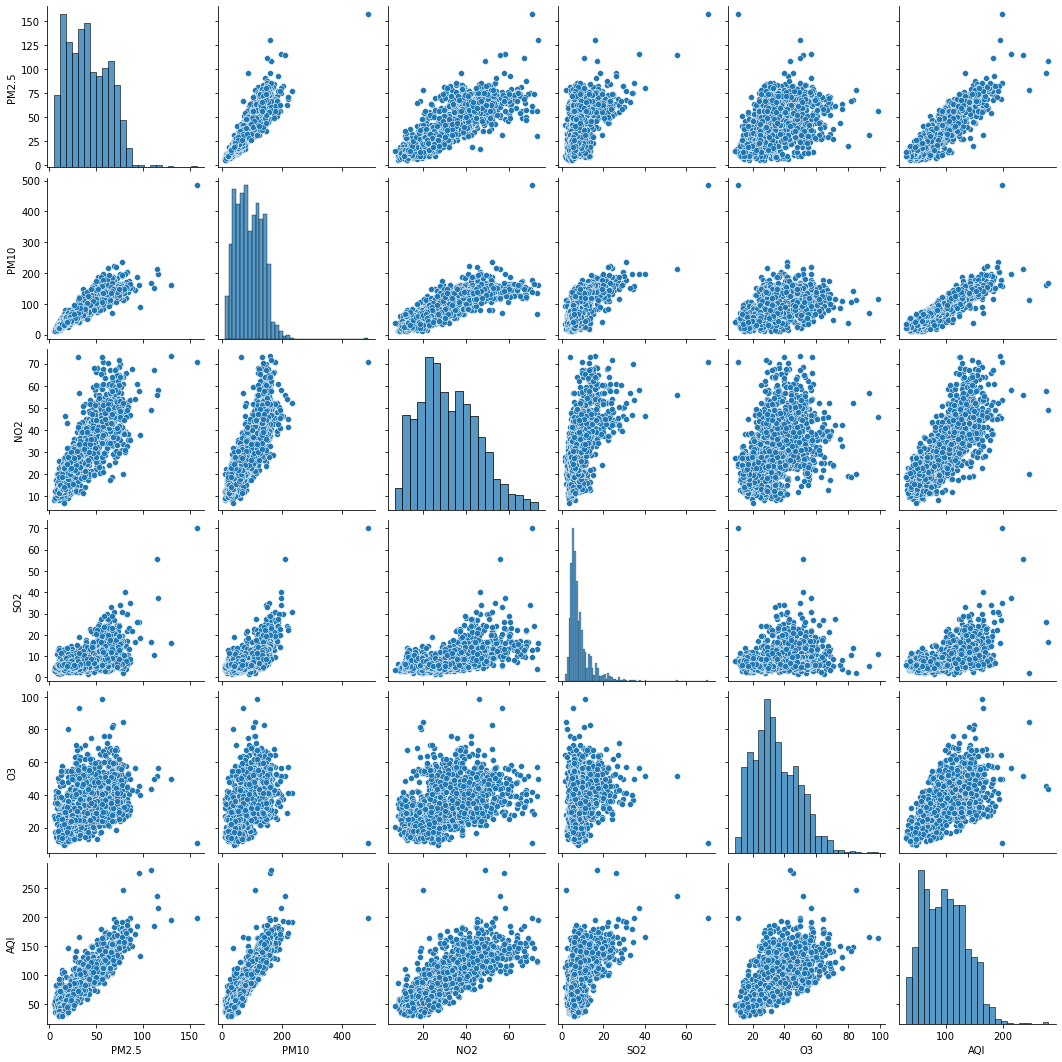

In [7]:
df=aqi[["PM2.5","PM10","NO2","SO2","O3","AQI"]]
sns.pairplot(df,kind="scatter")
plt.show()

In [8]:
aqi.corr()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
PM2.5,1.000000,0.901899,0.797051,0.464293,0.532314,0.433559,0.899950
PM10,0.901899,1.000000,0.805606,0.384963,0.648481,0.432300,0.888792
NO2,0.797051,0.805606,1.000000,0.539699,0.548949,0.379135,0.753527
CO,0.464293,0.384963,0.539699,1.000000,0.109220,0.061655,0.320647
SO2,0.532314,0.648481,0.548949,0.109220,1.000000,0.260901,0.552297
O3,0.433559,0.432300,0.379135,0.061655,0.260901,1.000000,0.600399
AQI,0.899950,0.888792,0.753527,0.320647,0.552297,0.600399,1.000000


<AxesSubplot:>

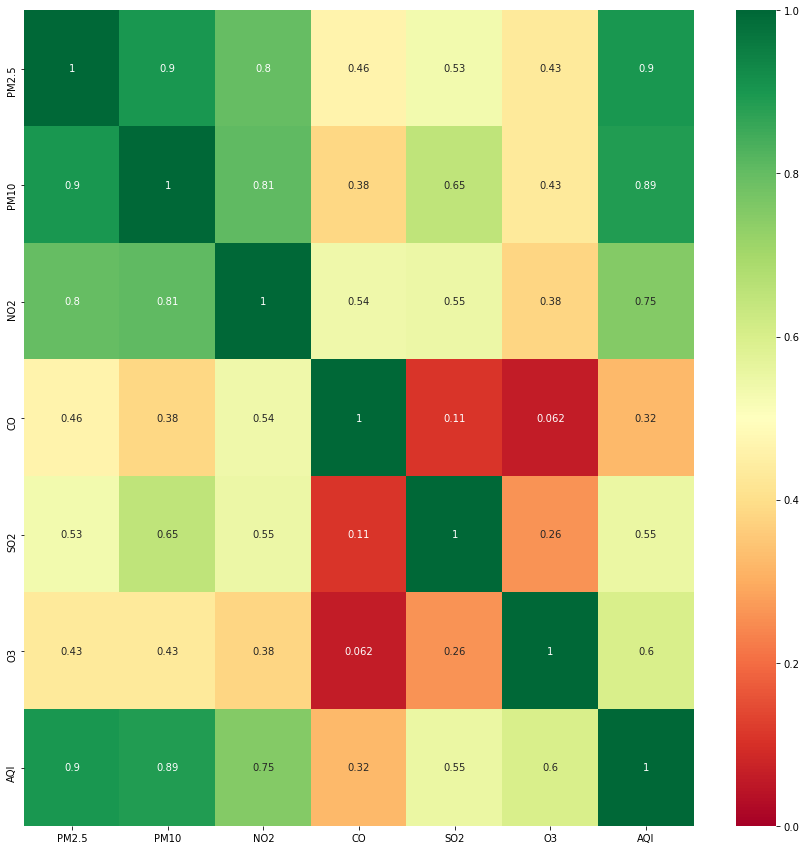

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(aqi.corr(),vmin=0,vmax=1,annot=True,robust=True,cmap="RdYlGn")

## Spliting Independent and Dependent Variables

In [13]:
x=aqi.iloc[:,0:6]
x

,PM2.5,PM10,NO2,CO,SO2,O3
0,61.25,100.46,39.37,0.25,6.08,69.11
1,47.21,80.12,52.00,0.33,20.73,47.61
2,65.45,132.09,58.68,0.31,22.99,50.37
3,116.03,197.89,58.20,0.15,37.31,56.42
4,96.21,162.27,57.60,0.00,25.88,45.66
...,...,...,...,...,...,...
1266,23.29,44.20,22.64,0.36,5.39,24.22
1267,15.80,32.18,22.73,0.36,6.36,22.25
1268,20.24,44.74,27.59,0.38,6.29,19.98
1269,19.38,41.95,24.58,0.39,5.30,17.40


In [14]:
y=data.iloc[:,-1].astype(int)
y

0       110
1       103
2       103
3       215
4       276
       ... 
1266     58
1267     49
1268     47
1269     46
1270     48
Name: AQI, Length: 1271, dtype: int32

<AxesSubplot:>

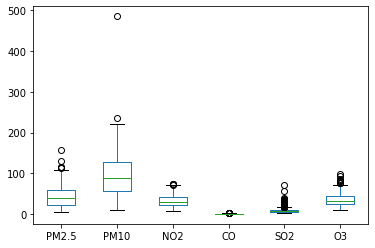

In [28]:
x.plot(kind='box')

In [29]:
for col in x:
    q1=x[col].describe()["25%"]
    q3=x[col].describe()["75%"]
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    out=x[col][(x[col]<lb) | (x[col]>ub)]
    out_num=out.shape[0]
    p=(out_num/1271)*100
    if(out_num>0):
        print(col,":",out_num)
        print(col,":",p)

PM2.5 : 5
PM2.5 : 0.3933910306845004
PM10 : 2
PM10 : 0.15735641227380015
NO2 : 4
NO2 : 0.3147128245476003
CO : 6
CO : 0.47206923682140045
SO2 : 97
SO2 : 7.631785995279309
O3 : 9
O3 : 0.7081038552321007


## so we can observe that there are not many outliers in any columns apart from SO2 where we have many outliers, so we can't remove all outliers in SO2 because we may lose important information of other columns. 

## Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

ETR=ExtraTreesRegressor()
ETR.fit(x,y)

ExtraTreesRegressor()

In [25]:
print(ETR.feature_importances_)

[0.35849144 0.28842113 0.18179539 0.03477207 0.03094957 0.10557041]


<AxesSubplot:>

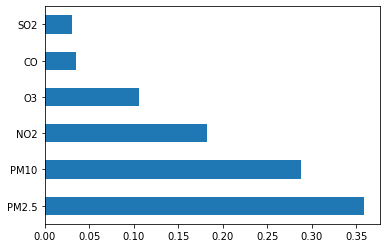

In [26]:
feat_importances=pd.Series(ETR.feature_importances_,index=x.columns)
feat_importances.nlargest(6).plot(kind="barh")

## So we can observe that SO2 is least important feature towards output variable and we also know this column has many outliers. So now you can just drop this column or consider if you want to(i'm considering as i don't have have huge data).

## Train and Test splitting

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_train

,PM2.5,PM10,NO2,CO,SO2,O3
156,12.30,31.28,11.70,0.07,3.66,48.45
1159,31.53,86.96,30.61,0.58,5.55,21.14
1151,46.51,109.13,29.56,0.52,8.82,26.06
277,22.60,46.38,24.12,0.57,7.36,43.87
767,62.79,128.51,47.79,0.68,4.32,35.52
...,...,...,...,...,...,...
1044,76.03,153.76,35.40,0.71,13.24,41.27
1095,40.04,74.46,25.03,0.45,6.19,26.31
1130,56.38,105.86,36.64,0.60,5.87,27.50
860,48.50,144.54,29.47,0.63,10.74,37.63


In [21]:
x_test

,PM2.5,PM10,NO2,CO,SO2,O3
1253,9.80,22.79,19.97,0.26,6.34,17.74
1187,29.36,61.50,25.74,0.51,9.14,29.65
422,47.97,104.93,38.91,0.74,9.83,56.45
976,18.19,52.44,16.45,0.35,5.51,15.16
793,40.84,105.87,30.23,0.41,5.24,29.00
...,...,...,...,...,...,...
486,44.32,101.87,37.73,0.67,6.11,43.87
626,53.68,107.41,44.83,0.80,8.20,16.94
221,17.76,44.97,15.61,0.24,6.22,32.72
243,24.42,75.72,16.47,0.22,13.58,32.11


## Performing Feature Scaling  using MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc=MinMaxScaler()

In [22]:
x_train=sc.fit_transform(x_train)

In [23]:
x_test=sc.transform(x_test)

# Building a Model

## Using XGBoost Regressor

In [66]:
import xgboost as xgb

In [31]:
xgbreg=xgb.XGBRegressor()
xgbreg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
y_pred_train=xgbreg.predict(x_train)
y_pred=xgbreg.predict(x_test)

In [33]:
from sklearn.metrics import *

In [34]:
# training score
r2_score(y_train,y_pred_train)

0.9989463092060511

In [35]:
# testing score
r2_score(y_test,y_pred)

0.8908027226712543

In [37]:
from sklearn import metrics

In [38]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 8.848373128853591
MSE: 174.914198886043
RMSE: 13.225513180441922


## We can clearly observe that model has overfitted, so we need to perform hyper parameter tuning to solve this and also reduce the error.

## Hyperparameter tuning using GridSearchCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# no of trees in RF
n_estimators=list(np.linspace(start=100,stop=1200,num=12,dtype="int"))

#various learning rate parameters
learning_rate=['0.05','0.1','0.2','0.3','0.4','0.5','0.6']

# max no of levels of tree
max_depth=np.linspace(5,30,num=6,dtype="int")

#subsample parameter values( Subsample ratio of the training instance.)
subsample =[0.7,0.8,0.9]

#minimum child weight parameters(Minimum sum of instance weight(hessian) needed in a child)
min_child_weight=[3,4,5,6,7]

In [41]:
# creating param grid
param_grid= {"n_estimators":n_estimators,
            "learning_rate":learning_rate,
             "max_depth":max_depth,
             "subsample":subsample,
             "min_child_weight":min_child_weight}

print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'], 'max_depth': array([ 5, 10, 15, 20, 25, 30]), 'subsample': [0.7, 0.8, 0.9], 'min_child_weight': [3, 4, 5, 6, 7]}


In [42]:
xgb_reg=xgb.XGBRegressor()

xgb=GridSearchCV(xgb_reg,param_grid=param_grid,scoring='r2', n_jobs=-1, cv=5, verbose=3)

In [43]:
xgb.fit(x_train,y_train)

Fitting 5 folds for each of 7560 candidates, totalling 37800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 20.8min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 36.4min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 38.7min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'learning_rate': ['0.05', '0.1', '0

In [44]:
xgb.best_score_

0.9140497616451715

In [46]:
xgb.best_params_

{'learning_rate': '0.05',
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [47]:
y_pred_train=xgb.predict(x_train)
y_pred=xgb.predict(x_test)

In [49]:
# Test score
r2_score(y_test,y_pred)

0.9072372862374839

In [52]:
r2_score(y_train,y_pred_train)

0.9661542761729377

In [53]:
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 8.02176940020393
MSE: 148.58901394965937
RMSE: 12.189709346397862


In [54]:
import joblib

In [55]:
joblib.dump(xgb,"aqi_project.pkl")

['aqi_project.pkl']

In [56]:
joblib.dump(sc,"scaler.pkl")

['scaler.pkl']

In [67]:
xgbreg=xgb.XGBRegressor()

In [64]:
from sklearn.pipeline import Pipeline

In [68]:
xgboost = Pipeline(steps=[('xgboost',GridSearchCV(xgbreg,param_grid=param_grid,scoring='r2', n_jobs=-1, cv=5, verbose=3))])

In [69]:
xgboost.fit(x_train,y_train)

Fitting 5 folds for each of 7560 candidates, totalling 37800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 18.0min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 31.4min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 33.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

Pipeline(steps=[('xgboost',
                 GridSearchCV(cv=5,
                              estimator=XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=None,
                                                     colsample_bynode=None,
                                                     colsample_bytree=None,
                                                     gamma=None, gpu_id=None,
                                                     importance_type='gain',
                                                     interaction_constraints=None,
                                                     learning_rate=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     min_child_weight=None,
                                        

In [72]:
joblib.dump(xgboost,"aqi_pro.pkl")

['aqi_pro.pkl']

# so we got r2_score of 96.6% on  train set and 90.7% on test set which is pretty much good and error value is less for XGBoost.